<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/Introduction_to_NLP_in_tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py

--2024-05-24 09:38:55--  https://raw.githubusercontent.com/databyhuseyn/DeepLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-24 09:38:55 (89.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import unzip_data, walk_through_dir, plot_loss_curves, create_tensorboard_callback, compare_historys

In [4]:
# Download data
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2024-05-24 09:39:02--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.207, 142.250.107.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.02s   

2024-05-24 09:39:02 (31.4 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
# Turn .csv files into pandas DataFrame's
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
# Shuffle train dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)      # frac returns percentage     # sample shuffles dataset and frac tells how many percents to shuffle
train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [7]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
# How many examples of each class?
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [9]:
print(f'Total training samples: {len(train_df)}')
print(f'Total test samples: {len(test_df)}')
print(f'Total samples: {len(train_df) + len(test_df)}')

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [10]:
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f'Target: {target}', '(real disaster)' if target > 0 else '(not real disaster)')
  print(f'Text:\n{text}\n')
  print('---\n')

Target: 0 (not real disaster)
Text:
A young heavyweight rapping off of detonate I been a leader not a lemon better get it straight ??

---

Target: 1 (real disaster)
Text:
Walking down the middle of Michigan Ave last Sunday during #Lolla evacuation 2015 https://t.co/YrfZ5WJ7R2

---

Target: 0 (not real disaster)
Text:
Brain twister let drop up telly structuring cast: EDcXO

---

Target: 0 (not real disaster)
Text:
DORETTE THATS THE NAME OF THE MUDSLIDE CAKE MAKER

---

Target: 1 (real disaster)
Text:
More than 300 campers evacuated as California wildfire blazes on officials say http://t.co/wwgAdpFFkW

---



In [11]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [12]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [13]:
# View the first 10 training sentence and their labels
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization


text_vectorizer = TextVectorization(max_tokens=None,    # how many words in the vocabulary (all of the different words in your text)      en chox istifade olunan sozleri basha qoyur ve onlari tokenize edir     necheye beraber olsa o qeder ilk bashdan muxtelif sozleri tokenize edir, none qoymushuq ki butun sozleri chevirsin
                                    standardize='lower_and_strip_punctuation',  # how to process text             # hamisini balaca herflerle yazir meselen (standartlashdirmaq uchun)
                                    split='whitespace',   # how to split tokens                           # her bir sozu whitespace ile bolsun
                                    ngrams=None,          # create groups of n-words?
                                    output_mode='int',    # how to map tokens to numbers              reqem formatinda cixarsin
                                    output_sequence_length=None)    # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True)       # Not valid if using max_tokens=None    # mes cumlede 20 soz olmalidi ve 10 soz varsa onda qalan 10 deneni '0' ile evez edir. output_sequence_length aktiv olanda ishe dushur

In [15]:
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))      # ortalama soz uzunlugunu tapiriq, chunki cumleler eyni uzunluqda olmalidi

15

Now let's create another TextVectorization object using our custom parameters.


In [16]:
# Setup text vectorization with custom variables
max_vocab_length = 10000    # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)         # cumlelerin uzunlugunu qoyduq

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [17]:
# Fit the vectorizer to the training text
text_vectorizer.adapt(train_sentences)            # fit yerine adapt ishledirik

In [18]:
# Create sample sentence and tokenize it
sample_sentence = "My crocodile ate my friend"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  13,    1,    1,   13, 1020,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [19]:
# Choose a random sentence from the training datast and tokenize it
random_sentence = random.choice(train_sentences)
print(f'Original text:\n{random_sentence}\
      n\nVectorized version:')
text_vectorizer([random_sentence])

Original text:
Phones Offers &gt;&gt; http://t.co/bYtbZ8s5ux #034 8-Pin Lightning Connector 2.1A Car Charger For Apple 5 5S 5C 6 6+ iPÛ_ http://t.co/o3wVScLiCX      n
Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[2805, 2831, 1135,    1,    1, 6300,  300, 3980, 6338,  127, 4022,
          10, 3179,  180, 6313]])>

uzunlugu 15 teyin etmishik deye qalan bosh yerlere 0-lar elave edir

In [20]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()         # hansi sozleri oyrenib baxmaq uchun
top_5_words = words_in_vocab[:5]   # most common tokens (notice the [UNK] token for 'unknown' words)
bottom_5_words = words_in_vocab[-5:]    # least common tokens
print(f'Number of words in vocab: {len(words_in_vocab)}')
print(f'Top 5 most common words: {top_5_words}')
print(f'Bottom 5 least common words: {bottom_5_words}')

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [21]:
tf.random.set_seed(42)
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length,          # set input shape
                             output_dim=128,                      # set size of embedding vector          # her soz uchun 128 deyerden ibaret metrice yaradir
                             embeddings_initializer='uniform',    # default, initialize randomly
                             input_length=max_length,             # how long is each input
                             name='embedding_1')
embedding                                                               # embedding creates matrices from the words. They behave like layers and they can learn their meanings from their using place and etc.

In [22]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f'Original text:\n{random_sentence}\
      \n\nEmbedded version:')
# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Vince McMahon once again a billionaire: I remember reading a deluge of posts about Vince McMahon losing $350 m... http://t.co/ko0oz3RYFg      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.03555135,  0.01585549,  0.02370428, ..., -0.02626635,
         -0.03539149,  0.0480204 ],
        [-0.02170351,  0.01612092,  0.03636599, ...,  0.02006943,
         -0.02068871,  0.0102361 ],
        [ 0.04102801, -0.02825254, -0.04727787, ..., -0.02492675,
          0.04059723, -0.01793225],
        ...,
        [ 0.04349441, -0.00708852, -0.02821453, ..., -0.01496732,
         -0.04026226, -0.04163184],
        [ 0.00587304,  0.03040618,  0.02732221, ...,  0.04867829,
          0.01198722,  0.03275875],
        [-0.03555135,  0.01585549,  0.02370428, ..., -0.02626635,
         -0.03539149,  0.0480204 ]]], dtype=float32)>

In [23]:
sample_embed[0][0]                # meselen bu 1 sozdu toplamda (meselen salam sozu)

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.03555135,  0.01585549,  0.02370428, -0.00698392, -0.04463056,
       -0.02914976, -0.03280608,  0.01157162,  0.01859992,  0.04802791,
        0.03391967, -0.01653595,  0.02741269,  0.0417291 ,  0.01036416,
        0.0296672 ,  0.04163584, -0.04090326,  0.03344325, -0.02742848,
        0.03488259, -0.04177497, -0.04099547,  0.00258964, -0.02284664,
       -0.00563352,  0.01716018,  0.02814743, -0.0068346 ,  0.00370087,
        0.00817448, -0.04576258, -0.02436905,  0.04573757, -0.03349274,
        0.04846558, -0.0272845 ,  0.03867921,  0.04831345, -0.00640075,
        0.02735797, -0.0390501 , -0.01464586,  0.0423628 ,  0.00636309,
        0.02699376, -0.02130984,  0.04997908,  0.03180695, -0.02601656,
        0.03340827, -0.03490277,  0.02707462, -0.04088657,  0.0304924 ,
        0.02438047, -0.02490803,  0.01340387,  0.00955198,  0.02070198,
        0.04898449, -0.02401917, -0.02041656,  0.02033008, -0.04514341,
       -0.031169

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Elaqelere baxmir, tekce probabilityleri yoxlayir
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),     # convert words to number using tfidf
    ('clf', MultinomialNB())          # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [25]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f'Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%')

Our baseline model achieves an accuracy of: 79.27%


In [26]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [27]:
model_0.predict(["earthquake didn't happen"])     # earthquake sozunu goren kimi Naive Bayes olduguna gore, aradaki elaqelere baxmir buna gore sehv chixarir

array([1])

# Creating an evaluation function for our model experiments

we could evaluate these as they are but since we're going to be evaluating several models in the same way going forward, let's create a helper function which takes an array of predictions and ground truth labels and computes the following



*   Accuracy
*   Precision
*   Recall
*   F1-score



In [28]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_results = {'accuracy': model_accuracy,
                   'precision': model_precision,
                   'recall': model_recall,
                   'f1': model_f1}
  return model_results

In [29]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                    y_pred=baseline_preds)
baseline_results                                                          # ish muhitinde olan bir haldi, baseline model duzeldirik ve onu kechmeye chalishiriq

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

# Model_1: A simple dense model

In [30]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = 'model_logs'

In [31]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1_dense')

In [32]:
# Compile model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [33]:
# Get a summary of the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [34]:
# Fit the model
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240524-093912
Epoch 1/5
215/215 [==============================] - 16s 53ms/step - loss: 0.6116 - accuracy: 0.6922 - val_loss: 0.5383 - val_accuracy: 0.7507
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4427 - accuracy: 0.8181 - val_loss: 0.4703 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3477 - accuracy: 0.8602 - val_loss: 0.4599 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2862 - accuracy: 0.8915 - val_loss: 0.4645 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2393 - accuracy: 0.9117 - val_loss: 0.4768 - val_accuracy: 0.7861


In [35]:
from helper_functions import plot_loss_curves

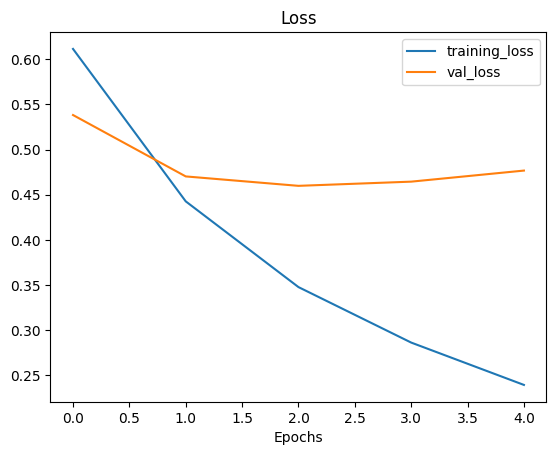

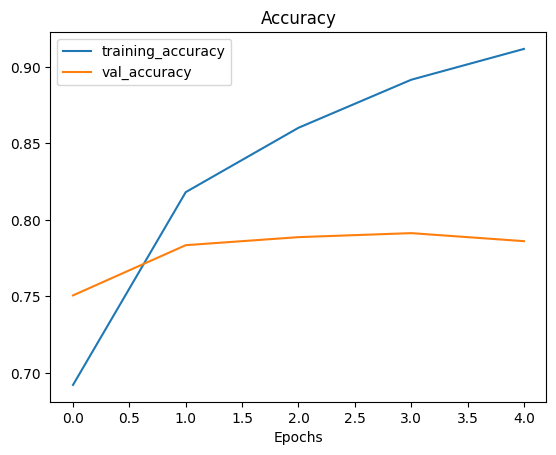

In [36]:
plot_loss_curves(model_1_history)

In [37]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4768 - accuracy: 0.7861


[0.47677576541900635, 0.7860892415046692]

In [38]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[-0.02743806, -0.04373866, -0.02958569, ..., -0.03743181,
         -0.01522299,  0.03049131],
        [ 0.03518969,  0.02124482,  0.00730531, ...,  0.02432301,
         -0.00472494, -0.02783114],
        [ 0.05040373,  0.0156101 , -0.04191612, ..., -0.01469448,
          0.06039526,  0.03098215],
        ...,
        [ 0.02970778, -0.0008988 ,  0.04261037, ...,  0.04687252,
         -0.03369451,  0.03768888],
        [ 0.04993023,  0.004311  , -0.0590752 , ..., -0.04326316,
         -0.00373952,  0.00174578],
        [ 0.08591805, -0.05475922, -0.05360098, ..., -0.09451096,
          0.03061325, -0.08235435]], dtype=float32)>]

In [39]:
embed_weights = model_1.get_layer('embedding_1').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [40]:
# Make predictions (these come back in the form of probablities)

model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]   # Only print first 10 predictions of model

24/24 [==============================] - 0s 2ms/step


array([[0.40779576],
       [0.74587387],
       [0.99762565],
       [0.11369557],
       [0.11261702],
       [0.9350107 ],
       [0.9113351 ],
       [0.99302703],
       [0.9685998 ],
       [0.26291123]], dtype=float32)

In [41]:
# Turn predictions probablities into single-dimension
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))      # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

Now we've got our model's predictions in the form of classes, we can use our calculate_results() function to compare them to the ground truth validation labels.

In [42]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.60892388451444,
 'precision': 0.7903277546022673,
 'recall': 0.7860892388451444,
 'f1': 0.7832971347503846}

How about we compare first deep model to our baseline model?

In [43]:
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

Since we'll be doing this kind of comparison (baseline compared to new model) quite a few times, let's create a function to help us out.

In [44]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f'Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key] - value:.2f}')

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.61, Difference: -0.66
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline recall: 0.79, New recall: 0.79, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.00


# Visualizing learned embeddings

In [45]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [46]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [47]:
# Get the weight matrix of embedding layer
embed_weights = model_1.get_layer('embedding_1').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


http://projector.tensorflow.org/ to visualize

In [48]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model_2

In [49]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(50, input_shape=(1,), activation='relu', kernel_initializer="he_normal")(x)
# x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name='model_2_dense')

In [50]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 50)                35800     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1315851 (5.02 MB)
Trainable params: 1315851 (5.02 MB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [51]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

In [52]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240524-093940
Epoch 1/5
215/215 [==============================] - 14s 57ms/step - loss: 0.2533 - accuracy: 0.9104 - val_loss: 0.5951 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 6s 27ms/step - loss: 0.1651 - accuracy: 0.9345 - val_loss: 0.6863 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 7s 34ms/step - loss: 0.1285 - accuracy: 0.9507 - val_loss: 0.9772 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 6s 26ms/step - loss: 0.1055 - accuracy: 0.9603 - val_loss: 1.2861 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 7s 33ms/step - loss: 0.0799 - accuracy: 0.9658 - val_loss: 1.2799 - val_accuracy: 0.7743


# Model_3

In [53]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(50, input_shape=(1,), activation='relu', kernel_initializer="he_normal")(x)
# x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name='model_2_dense')


In [54]:
model_3.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 50)                27000     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1307051 (4.99 MB)
Trainable params: 1307051 (4.99 MB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [55]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

In [56]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240524-094021
Epoch 1/5
215/215 [==============================] - 15s 61ms/step - loss: 0.2096 - accuracy: 0.9076 - val_loss: 0.7334 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 9s 41ms/step - loss: 0.0889 - accuracy: 0.9658 - val_loss: 0.9785 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 8s 39ms/step - loss: 0.0686 - accuracy: 0.9729 - val_loss: 1.3765 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 8s 39ms/step - loss: 0.0617 - accuracy: 0.9764 - val_loss: 1.4204 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 9s 40ms/step - loss: 0.0510 - accuracy: 0.9778 - val_loss: 2.0767 - val_accuracy: 0.7585


# Model_4: LSTM

In [57]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_2')

# Create LSTM model
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_4_embedding(x)
print(x.shape)

x = layers.LSTM(64)(x)
print(x.shape)

outputs = layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name='model_2_LSTM')

(None, 15, 128)
(None, 64)


In [58]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

In [59]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240524-094111
Epoch 1/5
215/215 [==============================] - 10s 34ms/step - loss: 0.5117 - accuracy: 0.7422 - val_loss: 0.4523 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3161 - accuracy: 0.8742 - val_loss: 0.5118 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2165 - accuracy: 0.9168 - val_loss: 0.5834 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1495 - accuracy: 0.9451 - val_loss: 0.6247 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1004 - accuracy: 0.9616 - val_loss: 0.9491 - val_accuracy: 0.7585


# Model 5

In [60]:
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_2')

In [61]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.LSTM(64, return_sequences = True, kernel_regularizer='l2')(x)
x = layers.LSTM(64, return_sequences = True, kernel_regularizer='l2')(x)
x = layers.LSTM(64)(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(8, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
outputs = layers.Dense(1, activation='sigmoid', kernel_regularizer='l2')(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_3_LSTM')

In [62]:
model_5.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics='accuracy')

In [63]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240524-094134
Epoch 1/5
215/215 [==============================] - 18s 46ms/step - loss: 2.0403 - accuracy: 0.5688 - val_loss: 0.9602 - val_accuracy: 0.5433
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.7989 - accuracy: 0.5733 - val_loss: 0.7245 - val_accuracy: 0.5433
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.6985 - accuracy: 0.5733 - val_loss: 0.6961 - val_accuracy: 0.5433
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.6861 - accuracy: 0.5733 - val_loss: 0.6923 - val_accuracy: 0.5433
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.6840 - accuracy: 0.5733 - val_loss: 0.6916 - val_accuracy: 0.5433


# Model_6

In [64]:
model_6_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=1024,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_2')

In [65]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_6_embedding(x)
x = layers.LSTM(4, return_sequences = True, kernel_regularizer='l2')(x)
outputs = layers.Dense(1, activation='sigmoid', kernel_regularizer='l2')(x)
model_6 = tf.keras.Model(inputs, outputs, name='model_6_LSTM')

In [66]:
model_6.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics='accuracy')

In [67]:
model_6_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240524-094205
Epoch 1/5
215/215 [==============================] - 3s 12ms/step - loss: 0.6833 - accuracy: 0.5733 - val_loss: 0.6914 - val_accuracy: 0.5433
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.6830 - accuracy: 0.5733 - val_loss: 0.6912 - val_accuracy: 0.5433
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.6828 - accuracy: 0.5733 - val_loss: 0.6912 - val_accuracy: 0.5433
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.6827 - accuracy: 0.5733 - val_loss: 0.6911 - val_accuracy: 0.5433
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.6826 - accuracy: 0.5733 - val_loss: 0.6911 - val_accuracy: 0.5433


In [70]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


((762, 1),
 array([[6.7114836e-01],
        [9.4033676e-01],
        [9.9999988e-01],
        [9.9510722e-02],
        [2.1605513e-06],
        [1.0000000e+00],
        [9.6944416e-01],
        [1.0000000e+00],
        [1.0000000e+00],
        [9.6616447e-01]], dtype=float32))

In [73]:
#Round out predictions and reduce to- dimensinal array
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [75]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)

model_3_results

{'accuracy': 75.8530183727034,
 'precision': 0.7592598843309307,
 'recall': 0.7585301837270341,
 'f1': 0.7587643330325206}

In [76]:
# Compare model 3 to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 75.85, Difference: -3.41
Baseline precision: 0.81, New precision: 0.76, Difference: -0.05
Baseline recall: 0.79, New recall: 0.76, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.03


# Model 3 : GRU

In [81]:
tf.random.set_seed(42)
from tensorflow.keras import layers

model_7_embedding =layers.Embedding(input_dim=max_vocab_length,
                                    output_dim = 128,
                                    embeddings_initializer='uniform',
                                    input_length= max_length,
                                    name="embedding_3")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_7_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_7 = tf.keras.Model(inputs, outputs, name="model_7_GRU")

In [82]:
#compile gru model
model_7.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [83]:
model_7.summary()

Model: "model_7_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [84]:
model_7_history = model_7.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 'GRU')])

Saving TensorBoard log files to: model_logs/GRU/20240524-103805
Epoch 1/5
215/215 [==============================] - 12s 39ms/step - loss: 0.5294 - accuracy: 0.7256 - val_loss: 0.4538 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3210 - accuracy: 0.8670 - val_loss: 0.4921 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.2197 - accuracy: 0.9164 - val_loss: 0.5530 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1591 - accuracy: 0.9441 - val_loss: 0.6059 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1197 - accuracy: 0.9594 - val_loss: 0.6042 - val_accuracy: 0.7651


In [86]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs.shape,model_7_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


((762, 1),
 array([[0.35068095],
        [0.88972837],
        [0.9970681 ],
        [0.1436991 ],
        [0.02280856],
        [0.98917377],
        [0.7060414 ],
        [0.9963664 ],
        [0.99631786],
        [0.48915118]], dtype=float32))

In [87]:
#Round out predictions and reduce to- dimensinal array
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [89]:
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 76.50918635170603,
 'precision': 0.7650786674444272,
 'recall': 0.7650918635170604,
 'f1': 0.7639596899608797}

In [90]:
#comparem to baseline
compare_baseline_to_new_results(baseline_results , model_7_results)

Baseline accuracy: 79.27, New accuracy: 76.51, Difference: -2.76
Baseline precision: 0.81, New precision: 0.77, Difference: -0.05
Baseline recall: 0.79, New recall: 0.77, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.02


#model 8 bidirectonal RNN model

In [91]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_8_embedding = layers.Embedding(input_dim= max_vocab_length,
                                     output_dim = 128,
                                     embeddings_initializer="uniform",
                                     input_length= max_length,
                                     name="embedding_8")

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_8_embedding(x)
x= layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_8 = tf.keras.Model(inputs, outputs, name='model_8_bidirection')

In [92]:
model_8.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [93]:
model_8.summary()

Model: "model_8_bidirection"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_8 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable param

In [94]:
model_8_history = model_8.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 'bidirection_RNN')])

Saving TensorBoard log files to: model_logs/bidirection_RNN/20240524-111112
Epoch 1/5
215/215 [==============================] - 14s 36ms/step - loss: 0.5110 - accuracy: 0.7444 - val_loss: 0.4610 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3136 - accuracy: 0.8727 - val_loss: 0.5140 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2138 - accuracy: 0.9190 - val_loss: 0.5547 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1470 - accuracy: 0.9496 - val_loss: 0.6474 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1050 - accuracy: 0.9635 - val_loss: 0.6720 - val_accuracy: 0.7756


In [97]:
model_8_pred_probs = model_8.predict(val_sentences)
model_8_pred_probs[:10]

24/24 [==============================] - 1s 3ms/step


array([[0.1464013 ],
       [0.8452693 ],
       [0.99906605],
       [0.15216655],
       [0.00620637],
       [0.99530077],
       [0.9274923 ],
       [0.99962306],
       [0.99956936],
       [0.26843023]], dtype=float32)

In [98]:
model_8_preds = tf.squeeze(tf.round(model_8_pred_probs))
model_8_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [99]:
model_8_results = calculate_results(y_true=val_labels,
                                    y_pred=model_8_preds)
model_8_results

{'accuracy': 77.55905511811024,
 'precision': 0.7754177691351334,
 'recall': 0.7755905511811023,
 'f1': 0.77478847733086}

In [100]:
compare_baseline_to_new_results(baseline_results , model_7_results)

Baseline accuracy: 79.27, New accuracy: 76.51, Difference: -2.76
Baseline precision: 0.81, New precision: 0.77, Difference: -0.05
Baseline recall: 0.79, New recall: 0.77, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.02


In [101]:
embedding_test = embedding(text_vectorizer(["this is a test sentence"]))
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu")
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalAveragePooling1D()
max_pool_output = max_pool(conv_1d_output)
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape


(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [102]:
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 0.09826498,  0.05221874, -0.03833597, ..., -0.07236072,
           0.00409402, -0.03969882],
         [ 0.02539727, -0.0773513 ,  0.01803409, ..., -0.03512773,
           0.02236886, -0.05418809],
         [ 0.09612386,  0.00745731, -0.04027412, ..., -0.02070711,
          -0.04637647, -0.04887903],
         ...,
         [-0.01968755, -0.04842046, -0.00456963, ..., -0.04830788,
          -0.0162142 ,  0.02238282],
         [-0.01968755, -0.04842046, -0.00456963, ..., -0.04830788,
          -0.0162142 ,  0.02238282],
         [-0.01968755, -0.04842046, -0.00456963, ..., -0.04830788,
          -0.0162142 ,  0.02238282]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[1.63627565e-02, 5.23567386e-03, 0.00000000e+00, 0.00000000e+00,
          6.43876987e-03, 0.00000000e+00, 6.51207799e-03, 0.00000000e+00,
          5.63302338e-02, 4.54634354e-02, 0.00000000e+00, 0.00000000e+00,
          1.

In [105]:

tf.random.set_seed(42)
from tensorflow.keras import layers
model_9_embedding = layers.Embedding(input_dim= max_vocab_length,
                                     output_dim = 128,
                                     embeddings_initializer="uniform",
                                     input_length= max_length,
                                     name="embedding_9")

from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_9_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_9 = tf.keras.Model(inputs, outputs, name="model_5_Con1d")

model_9.compile(loss="binary_crossentropy",
              optimizer= tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_9.summary()

Model: "model_5_Con1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_9 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_average_pooling1d_2  (None, 32)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_12 (Dense)            (None, 1)               

In [106]:
model_9_history = model_9.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 'bidirection_RNN')])

Saving TensorBoard log files to: model_logs/bidirection_RNN/20240524-115853
Epoch 1/5
215/215 [==============================] - 13s 47ms/step - loss: 0.5385 - accuracy: 0.7268 - val_loss: 0.4676 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.3342 - accuracy: 0.8597 - val_loss: 0.5117 - val_accuracy: 0.7822
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2291 - accuracy: 0.9126 - val_loss: 0.5867 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.1648 - accuracy: 0.9359 - val_loss: 0.6880 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1224 - accuracy: 0.9499 - val_loss: 0.7810 - val_accuracy: 0.7572


In [107]:
model_9_pred_probs = model_9.predict(val_sentences)
model_9_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[0.68148553],
       [0.82122844],
       [0.99999523],
       [0.01972355],
       [0.02283288],
       [0.97916096],
       [0.8662694 ],
       [0.999506  ],
       [0.99999344],
       [0.15923919]], dtype=float32)

In [110]:
model_9_preds = tf.squeeze(tf.round(model_9_pred_probs))
model_9_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [112]:
model_9_results = calculate_results(y_true=val_labels,
                                    y_pred=model_9_preds)
model_9_results

{'accuracy': 75.7217847769029,
 'precision': 0.7568784468743027,
 'recall': 0.7572178477690289,
 'f1': 0.7563501070538545}

In [113]:
compare_baseline_to_new_results(baseline_results , model_7_results)

Baseline accuracy: 79.27, New accuracy: 76.51, Difference: -2.76
Baseline precision: 0.81, New precision: 0.77, Difference: -0.05
Baseline recall: 0.79, New recall: 0.77, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.02
